In [2]:
## Statistical analysis

In [4]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
from requests.auth import HTTPBasicAuth
import requests
import pandas as pd
import json

In [6]:
objects = pd.read_json('data/DMH - Pop_up_VR_Museum - Objects classification - English.json')
objects

,_id,Object name,Object,Special name,Object number,Designer,Production date,Collection,Manufacturer,Dimension in cm,...,Colour,_datasetid,_timestamp,_timestamp_year,_timestamp_month,_timestamp_day,_timestamp_hour,_timestamp_minute,_timestamp_second,_updated
0,634f1907d8af1b50664089d0,*,jug,teapot,B561,*,19th century,Antell,*,"16,8 x 14 x 15",...,"light brown, dark brown",0daa0287-d7f4-4f03-a068-95f43afcc347,1666128834,2022,10,18,22,33,54,1.0
1,634f1903a45b33465c10ceb2,Windbreaker,Jacket,Jacket,44166,"Kellokumpu, Ritva",1984,Käyttökokoelma,Torstai,*,...,"orange, green, blue, pink",0daa0287-d7f4-4f03-a068-95f43afcc347,1666128709,2022,10,18,22,31,49,1.0
2,634f1912d8af1b50664089d6,Rautaristi (Iron Cross),wall textile,ryijy rug,16850,"Keinänen-Baeckmann, Aino",1931,*,Oy Neovius Ab,145 cm x 100 cm,...,"violet (centre), yellowish (edge)",0daa0287-d7f4-4f03-a068-95f43afcc347,1666128146,2022,10,18,22,22,26,NaN
3,634f1912e09bfd1d9a04b8f9,Valkoiset hevoset (White Horses),wall textile,ryijy rug,13906,"Sotavalta, Impi",1932,*,"Humalajärvi, Kerttu",173 cm x 126 cm,...,"white, red, brown",0daa0287-d7f4-4f03-a068-95f43afcc347,1666128146,2022,10,18,22,22,26,NaN
4,634f1912d4227a56290cb6d2,Liekki (Flame),"wall textile, art textile",ryijy rug,17876,"Gallen-Kallela, Akseli",1899,*,"Suomen Käsityön ystävät / Asikainen, Ann-Mari...",175 cm x 250 cm,...,?,0daa0287-d7f4-4f03-a068-95f43afcc347,1666128146,2022,10,18,22,22,26,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,634f18fee09bfd1d9a04b8ec,Paimio / Armchair 41,chair,armchair,9249,"Aalto, Alvar",1932,*,"Artek, Huonekalutehdas Korhonen",60 x 64 x 80,...,"black, birch",0daa0287-d7f4-4f03-a068-95f43afcc347,1666128126,2022,10,18,22,22,6,NaN
59,634f18fed4227a56290cb6c5,Pastille,chair,armchair,44165,"Aarnio, Eero",1968,*,Asko Oy,92 x 92 x 53,...,yellow,0daa0287-d7f4-4f03-a068-95f43afcc347,1666128126,2022,10,18,22,22,6,NaN
60,634f18feb7693f159a62e2ef,High chair 616,chair,high chair,9226,"Schultén, Ben af",1965,*,"Artek Oy, Huonekalutehdas Korhonen Oy ja Norrc...","42,8 x 44 x 77",...,"red, birch",0daa0287-d7f4-4f03-a068-95f43afcc347,1666128126,2022,10,18,22,22,6,NaN
61,634f18fd9d480d2bcc4ac79f,Stool 60,chair,stool,44163,"Aalto, Alvar",1933,Käyttökokoelma,Artek,38 x 38 x 44,...,birch,0daa0287-d7f4-4f03-a068-95f43afcc347,1666128125,2022,10,18,22,22,5,NaN


In [11]:
"""
# It has emotions but it is not related to previous one or objects in any way (_id doesnt match with DMH_213Stories)
artworkEmotions = pd.read_json('data/DMH_91Stories_DEGARI_SemanticAnnotator.json')
artworkEmotions
"""

"\n# It has emotions but it is not related to previous one or objects in any way (_id doesnt match with DMH_213Stories)\nartworkEmotions = pd.read_json('data/DMH_91Stories_DEGARI_SemanticAnnotator.json')\nartworkEmotions\n"

In [12]:
# Artwork emotions (associated to object story)
artworkEmotions = pd.read_json('data/DMH_213Stories_DEGARI_SemanticAnnotator.json')
artworkEmotions


,_id,Artefact,Artefact_ID,Type,English,Finnish,Swedish,Italian,degari_emotions,plutchik_emotions,...,@id,_datasetid,_timestamp,_timestamp_year,_timestamp_month,_timestamp_day,_timestamp_hour,_timestamp_minute,_timestamp_second,_updated
0,3,Garbage bin - Helsinki,Unlisted,response,I always greet a a garbage bin with joy. The p...,Roskista tervehdin aina ilolla. Saa tyhjättyä ...,Jag hälsar alltid på en soptunna med glädje. F...,Saluto sempre un cestino con gioia.Le tasche p...,,"{'anger': 0, 'anticipation': 0.454545454545454...",...,3,46ed6774-8af7-468c-b6a8-a0544d0b1ad2,1665763676,2022,10,14,17,7,56,True
1,2,Fiskars scissors,3,response,These were a part of my childhood home and now...,Kuulunut omaan lapsuuden kotiin kuin nyt omaan...,Dessa var en del av mitt barndomshem och nu en...,Questi facevano parte della mia casa d'infanzi...,,"{'anger': 0, 'anticipation': 0, 'disgust': 0, ...",...,2,46ed6774-8af7-468c-b6a8-a0544d0b1ad2,1665763676,2022,10,14,17,7,56,True
2,1,Solifer moped,32271,response,In this picture there is a moped from the 1960...,Tässä on kuvassa tällanen mopedi 1960-luvulta....,På den här bilden finns en moped från 1960-tal...,In questa foto c'è un ciclomotore dagli anni '...,,"{'anger': 0, 'anticipation': 0, 'disgust': 0, ...",...,1,46ed6774-8af7-468c-b6a8-a0544d0b1ad2,1665763676,2022,10,14,17,7,56,True
3,8,Windbreaker - Torstai,Unlisted,response,"Yuck – the sweat smelled bad, when wearing a w...",Yäk – tuulipukuhiki haisi – nailon?,"Usch – svetten luktade illa, när man bar en vi...","Yuck - Il sudore aveva un cattivo odore, quand...",,"{'anger': 0.14285714285714202, 'anticipation':...",...,8,46ed6774-8af7-468c-b6a8-a0544d0b1ad2,1665763675,2022,10,14,17,7,55,True
4,7,Rug - Suo,Unlisted,response,I am Kaarina and a very big friend of these lo...,Oon näitten kangaspuitten oikein suuri ystävä....,Jag är Kaarina och en mycket stor vän till väv...,Sono Kaarina e una grande amica di questi tela...,Joy,"{'anger': 0.15384615384615302, 'anticipation':...",...,7,46ed6774-8af7-468c-b6a8-a0544d0b1ad2,1665763675,2022,10,14,17,7,55,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
208,208,Rug - Suo,Unlisted,response,And I have a picture of this rug from Ritva Pu...,"Ja mul on kuva tästä Ritva Puotilan ryijystä, ...",Och jag har en bild på den här ryan från Ritva...,E ho una foto di questo tappeto di Ritva Puoti...,Disapproval; Pessimism,"{'anger': 0, 'anticipation': 0.214477211796246...",...,208,46ed6774-8af7-468c-b6a8-a0544d0b1ad2,1665763635,2022,10,14,17,7,15,True
209,207,Jerry Canister,32029,response,Now this one didn’t fit me at all. The comment...,Nyt ei loksahtanut ollenkaan. Nämä puheenvuoro...,Nu passade inte den här mig alls. Kommentarern...,Ora questo non mi andava affatto.I commenti qu...,,"{'anger': 0, 'anticipation': 0.204081632653061...",...,207,46ed6774-8af7-468c-b6a8-a0544d0b1ad2,1665763635,2022,10,14,17,7,15,True
210,211,Fiskars scissors,3,response,"Orange is a primary colour. However, when you ...","Oranssi on perusväri. Kuitenkin, kun näkee sen...","Orange är en primära färg. Men när du ser det,...","L'arancione è un colore primario.Tuttavia, qua...",,"{'anger': 0, 'anticipation': 0.454545454545454...",...,211,46ed6774-8af7-468c-b6a8-a0544d0b1ad2,1665763635,2022,10,14,17,7,15,True
211,213,Garbage bin - Helsinki,Unlisted,response,These are nowadays full of masks.,Nama on nykyisin taynna maskeja.,Dessa är numera fulla av masker.,Questi sono oggi pieni di maschere.,,"{'anger': 0, 'anticipation': 0, 'disgust': 0, ...",...,213,46ed6774-8af7-468c-b6a8-a0544d0b1ad2,1665763634,2022,10,14,17,7,14,True


In [7]:
# Written stories (users)
interactions = pd.read_json('data/DMH - Pop_up_VR_Museum - Written Stories.json')
interactions

,_id,Object,Object number,Date of recording,Context/event/workshop,Contributor name,End-user community,Comment ID (#),Original language,Finnish translation,...,Additional info,_datasetid,_timestamp,_timestamp_year,_timestamp_month,_timestamp_day,_timestamp_hour,_timestamp_minute,_timestamp_second,_updated
0,635066d3b4cb1601a61b6bbd,Garbage bin - City of Helsinki,44167,17/03/2022,*,Anonymous,Senior citizens,#44167C2,Finnish,Tämähän on ikuinen.,...,*,a6485ac3-fcdd-44f7-af05-58483999c944,1666214444,2022,10,19,22,20,44,1.0
1,6350672241842a53891d0068,Windbreaker - Torstai,44166,17/03/2022,Lahti,Riitta Katriina Louhensalo,Senior citizens,#44166C5,Finnish,"Tuulitakki on ikävimpiä vaatteita, joita suoma...",...,*,a6485ac3-fcdd-44f7-af05-58483999c944,1666213666,2022,10,19,22,7,46,NaN
2,635067223674d93942521554,Windbreaker - Torstai,44166,22/03/2022,Laajasalo,Anonymous,Senior citizens,#44166C6,Finnish,Loputon pilan aihe vieläkin.,...,*,a6485ac3-fcdd-44f7-af05-58483999c944,1666213666,2022,10,19,22,7,46,NaN
3,63506722863e5377923506ad,Windbreaker - Torstai,44166,22/03/2022,Laajasalo,Anonymous,Senior citizens,#44166C7,Finnish,Tällainen tuulitakki/puku on aikoinaan ollut k...,...,*,a6485ac3-fcdd-44f7-af05-58483999c944,1666213666,2022,10,19,22,7,46,NaN
4,635067211cd426747368f353,Windbreaker - Torstai,44166,08/03/2022,Orimattila,Anonymous,General audience,#44166C2,Finnish,Tuulipuvulla pääsi ilmaiseksi teatteriesitykse...,...,*,a6485ac3-fcdd-44f7-af05-58483999c944,1666213665,2022,10,19,22,7,45,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,6350670327e9e11b76553a60,Stool - Sauna Stool,9321,21/09/2022,"Workshop for a group, at Design Museum",Anonymous,Finnish language students,#9321C3,Finnish,Saunajakkara. Bastu pall. On mukava tuoli. On ...,...,*,a6485ac3-fcdd-44f7-af05-58483999c944,1666213635,2022,10,19,22,7,15,NaN
96,6350670341842a53891d0054,Stool - Sauna Stool,9321,21/09/2022,"Workshop for a group, at Design Museum",Anonymous,Finnish language students,#9321C4,Finnish,Tämä on pöytä. Tosi kaunis. On vanha. Kauan 19...,...,*,a6485ac3-fcdd-44f7-af05-58483999c944,1666213635,2022,10,19,22,7,15,NaN
97,63506702d6c1232ecd1b449d,Shirt - Jokapoika,41821,22/03/2022,Laajasalo,Anonymous,Senior citizens,#41821C8,Finnish,"Arkinen, jokapoikainen paita – ei juhlaan.",...,*,a6485ac3-fcdd-44f7-af05-58483999c944,1666213634,2022,10,19,22,7,14,NaN
98,63506702b4cb1601a61b6bdb,Shirt - Jokapoika,41821,22/03/2022,Laajasalo,Anonymous,Senior citizens,#41821C9,Finnish,Entinen työkaverini aina käytti mari-paitoja t...,...,*,a6485ac3-fcdd-44f7-af05-58483999c944,1666213634,2022,10,19,22,7,14,NaN


In [ ]:
#--------------------------------------------------------------------------------------------------------------------------
#    Merge
#--------------------------------------------------------------------------------------------------------------------------

In [6]:
#--------------------------------------------------------------------------------------------------------------------------
#    Statistics
#--------------------------------------------------------------------------------------------------------------------------

In [10]:
# Number of different authors
print(pd.unique(objects['Object number']))
print("\n")
print(len(pd.unique(objects['Object number'])))

['B561' '44166' '16850' '13906' '17876' '32628' '32627' '16851' '44184'
 '32361' '33288' '44181' '44182' '44183' '44178' '44179' '44180' '44175'
 '44176' '44177' '7762' 'ILM7606' '14218' '10026' '12595' '22769' 'AM1699'
 '44185' 'A652' '44171, 44172, 44173' '44174' '8182' 'C370'
 '44168, 44169, 44170' '41816' '44167' '11780' '32271' '32030' '41379'
 '20260' '13154' '38267' '41581' '41377' '30074' '27303' '38518' '13081'
 '41821' '38467' '35971' '41768' 'B548' '17248' '9321' '41793' '16101'
 '9249' '44165' '9226' '44163' '44164']


63


In [53]:
# Number of different authors
print(pd.unique(artworks['Artist_country']))
print("\n")
print(len(pd.unique(artworks['Artist_country'])))

['Lithuania' 'Italy' 'Greece' 'France' 'Russian Federation' 'Austria'
 'United Kingdom' 'Germany' 'United States' '']


10


In [54]:
# Number of different authors
print(pd.unique(artworks['Artwork_Artistic_Movement']))
print("\n")
print(len(pd.unique(artworks['Artwork_Artistic_Movement'])))

['Scuola romana' 'Romanticism' 'Art Informel' 'Surrealism' 'Plein Air'
 'Metaphysical painting' 'Realism' 'Magic realism' 'Eclecticism'
 'Futurism' 'Avant garde' 'Art Nouveau' 'Verism' 'Post-impressionism'
 'Abstract art' 'Gruppo Novecento' 'Viennese Actionism' 'Divisionism'
 'Historical Romanticism' 'MAC' 'Art Brut' 'Scapigliatura' 'Op Art'
 'Symbolism' 'Pop Art' 'Neoclassicism']


26


In [55]:
# Number of different authors
print(pd.unique(artworks['Materials']))
print("\n")
print(len(pd.unique(artworks['Materials'])))

['none' 'burlap, resin' 'sponge, acrylic, cork' 'video' 'plaster' 'wax'
 'resin, plexiglass' 'marble']


8


In [56]:
# Number of different authors
print(pd.unique(artworks['Technique']))
print("\n")
print(len(pd.unique(artworks['Technique'])))

['bronze' 'marble' 'mixed tecnique' 'tempera painting' 'oil on wood'
 'oil painting' 'oil on canvas applied on cardboard' 'oil on plywood'
 'ceramic' 'watercolor on paper' 'paper on canvas' 'oil on cardboard'
 'wood' 'gouache' 'video' 'plaster' 'wax' 'tulipier wood' 'mixed'
 'acrylic resins on plexiglass' 'screen printing on acrylic on canvas']


21


In [9]:
#--------------------------------------------------------------------------------------------------------------------------
#    Statistical study
#--------------------------------------------------------------------------------------------------------------------------

In [10]:
# number users
print(len(users))
print(len(artworks))
print(len(interactions))

55
56
100


In [14]:
print(pd.unique(interactions['userName']))
print(len(pd.unique(interactions['userName'])))

['anonymous' '6rK3p7za' 'BTKF72et' 'fqybaAk8' 'yjlouq5U' 'ox8G7avH'
 'LW3Klzvx' 'RQ4a2nIG' 'LvIeXwcT' 'e4aM9WL7' 'q2BDj1os' 'WYCImqGm'
 'cBjFhvjx' '0bAAwK14' 'JgevtrSb' 'Sz5Wx2XD' 'x1MyQX2C' 'WsK2A1ab'
 'ZWrgWx9o' 'N72IRgFy' 'B3N0HGw4' 'Y0WXF1LR']
22


In [16]:
print(len(interactions[interactions['userName'] == 'anonymous']))

42


In [17]:
print(len(user_interactions))

14


In [18]:
# https://stackoverflow.com/questions/18792918/combine-two-pandas-data-frames-join-on-a-common-column
# Now merge with user data
user_interactions2 = pd.merge(users, interactions_grouped, on='userName', how='right')
user_interactions2.dropna(subset = ['IdArtefact'], inplace = True)
user_interactions2

,_id_x,userName,TimeStamps,Gender,Age,RelationshipWithArt,RelationshipWithMuseum,content_breaking,_datasetid_x,_timestamp_x,...,senticnet_emotion_recognition,senticnet_concept_parsing,senticnet_subjectivity_detection,senticnet_polarity_classification,senticnet_intensity_ranking,senticnet_aspect_extraction,senticnet_personality_prediction,senticnet_depression_categorization,senticnet_toxicity_spotting,@id
0,NaN,0bAAwK14,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,[No emotions detected],[['N'; 'o'; ' '; 'c'; 'o'; 'n'; 'c'; 'e'; 'p';...,[OBJECTIVE],[NEUTRAL],[0.0],[No aspects discovered],[No personality trait detected],[0%],[0%],[57]
1,NaN,6rK3p7za,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,"[grief; terror, fear, responsiveness, annoyanc...","[['waste'; 'land'; 'cruellest'], ['storm'], ['...","[SUBJECTIVE, SUBJECTIVE, SUBJECTIVE, SUBJECTIV...","[NEGATIVE, NEGATIVE, POSITIVE, NEGATIVE, POSIT...","[-0.725, -0.408, 0.252, -0.224, 0.749, 0.849, ...","[No aspects discovered, No aspects discovered,...","[No personality trait detected, No personality...","[100%, 33%, 0%, 16%, 0%, 0%, 66%, 0%, 0%, 50%]","[0%, 0%, 0%, 33%, 0%, 0%, 0%, 0%, 0%, 0%]","[7, 2, 15, 20, 42, 68, 73, 86, 85, 96]"
2,B3N0HGw4,B3N0HGw4,2022-01-10 17:07:46,Femmina,20-30 anni,Ho un forte interesse per l'arte,Visito di tanto in tanto musei e mostre,Vorrei vedere i contenuti in Lingua dei Segni ...,c463550f-12ca-47d8-a1f7-8fda690781cb,1.665122e+09,...,[rage],[['rile']],[SUBJECTIVE],[NEGATIVE],[-0.893],[No aspects discovered],[No personality trait detected],[0%],[50%],[94]
3,NaN,BTKF72et,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,"[No emotions detected, No emotions detected, e...","[['daye'], ['daye'], ['hold on']]","[OBJECTIVE, OBJECTIVE, SUBJECTIVE]","[NEUTRAL, NEUTRAL, POSITIVE]","[0.0, 0.0, 0.853]","[['daye'], ['daye'], No aspects discovered]","[No personality trait detected, No personality...","[0%, 0%, 0%]","[0%, 0%, 0%]","[4, 3, 16]"
4,JgevtrSb,JgevtrSb,2022-09-30 11:16:16,Preferisco non specificarlo,45-60,Ho un forte interesse per l'arte,Visito spesso i musei,Non mi interessano i contenuti in Lingua dei S...,c463550f-12ca-47d8-a1f7-8fda690781cb,1.665122e+09,...,[grief; loathing],[[NOT 'mare']],[SUBJECTIVE],[NEGATIVE],[-0.901],[No aspects discovered],[No personality trait detected],[50%],[50%],[56]
5,LW3Klzvx,LW3Klzvx,2022-01-10 17:09:19,Femmina,20-30 anni,L'arte mi interessa poco,Visito raramente musei e mostre,Non mi interessano i contenuti in Lingua dei S...,c463550f-12ca-47d8-a1f7-8fda690781cb,1.665122e+09,...,[No emotions detected],[['N'; 'o'; ' '; 'c'; 'o'; 'n'; 'c'; 'e'; 'p';...,[OBJECTIVE],[NEUTRAL],[0.0],[No aspects discovered],[No personality trait detected],[0%],[0%],[22]
6,LvIeXwcT,LvIeXwcT,2022-01-10 10:53:03,Preferisco non specificarlo,45-60,Non provo nessun interesse per l'arte,Visito raramente musei e mostre,Non mi interessano i contenuti in Lingua dei S...,c463550f-12ca-47d8-a1f7-8fda690781cb,1.665122e+09,...,"[grief; loathing, No emotions detected]","[['anny'], ['N'; 'o'; ' '; 'c'; 'o'; 'n'; 'c';...","[SUBJECTIVE, OBJECTIVE]","[NEGATIVE, NEUTRAL]","[-0.807, 0.0]","[No aspects discovered, No aspects discovered]","[No personality trait detected, No personality...","[50%, 0%]","[50%, 0%]","[26, 48]"
7,N72IRgFy,N72IRgFy,2022-01-10 16:23:52,Maschio,13-19 anni,L'arte mi interessa poco,Visito di tanto in tanto musei e mostre,Non mi interessano i contenuti in Lingua dei S...,c463550f-12ca-47d8-a1f7-8fda690781cb,1.665122e+09,...,[ecstasy; delight],[['mare']],[SUBJECTIVE],[POSITIVE],[0.901],[No aspects discovered],[No personality trait detected],[0%],[0%],[92]
8,RQ4a2nIG,RQ4a2nIG,2022-01-10 11:21:12,Preferisco non specificarlo,Preferisco non specificarlo,Non provo nessun interesse per l'arte,Visito raramente musei e mostre,Non mi interessano i contenuti in Lingua dei S...,c463550f-12ca-47d8-a1f7-8fda690781cb,1.665122e+09,...,"[grief; loathing, serenity; acceptance, ecstas...","[['con'; 'none'], ['ansi'], ['montage'], ['N';...","[SUBJECTIVE, SUBJECTIVE, SUBJECTIVE, OBJECTIVE...",

In [19]:
print(len(user_interactions))
print(len(user_interactions2))

14
22


In [25]:
# How many artworks any user interacted with
idArtefacts = user_interactions2['IdArtefact']
idArtefacts2 = idArtefacts.values.tolist()
idArtefacts3 = set(sum(idArtefacts2, []))
print(idArtefacts3)
print("\n")
print(len(idArtefacts3))

{35456, 39425, 39426, 35459, 35330, 39427, 39175, 39182, 35215, 35217, 35221, 35222, 35224, 35225, 35227, 35229, 35230, 35360, 39200, 35362, 35364, 35245, 35246, 35249, 39347, 35380, 39352, 35256, 39364, 35400, 35412, 35287, 35288, 39384, 39648, 39138, 35433, 35307, 35567, 35445, 39416, 41209, 35323, 41213}


44


In [29]:
# How many artworks each user interacted with 
user_interactions['lenInteractedArtworks'] = user_interactions['IdArtefact'].str.len()
print(user_interactions[['userName', 'lenInteractedArtworks']])

    userName  lenInteractedArtworks
9   Sz5Wx2XD                      1
13  Y0WXF1LR                      1
14  RQ4a2nIG                     11
15  yjlouq5U                      1
18  WsK2A1ab                      1
24  cBjFhvjx                      2
25  WYCImqGm                      1
29  B3N0HGw4                      1
37  q2BDj1os                      1
39  JgevtrSb                      1
42  LvIeXwcT                      2
46  ZWrgWx9o                      1
48  N72IRgFy                      1
50  LW3Klzvx                      1


In [30]:
# How many artworks each user interacted with 
user_interactions2['lenInteractedArtworks'] = user_interactions2['IdArtefact'].str.len()
print(user_interactions2[['userName', 'lenInteractedArtworks']])

     userName  lenInteractedArtworks
0    0bAAwK14                      1
1    6rK3p7za                     10
2    B3N0HGw4                      1
3    BTKF72et                      3
4    JgevtrSb                      1
5    LW3Klzvx                      1
6    LvIeXwcT                      2
7    N72IRgFy                      1
8    RQ4a2nIG                     11
9    Sz5Wx2XD                      1
10   WYCImqGm                      1
11   WsK2A1ab                      1
12   Y0WXF1LR                      1
13   ZWrgWx9o                      1
14  anonymous                     42
15   cBjFhvjx                      2
16   e4aM9WL7                      3
17   fqybaAk8                      6
18   ox8G7avH                      8
19   q2BDj1os                      1
20   x1MyQX2C                      1
21   yjlouq5U                      1


In [31]:
# How many users don't have emotions
user_interactions2['lenInteractedArtworks'] = user_interactions2['IdArtefact'].str.len()
print(result)

ValueError: ('Lengths must match to compare', (22,), (0,))

In [32]:
import matplotlib.pyplot as plt

In [41]:
user_interactions2a = user_interactions2[['lenInteractedArtworks']]
user_interactions2a['Count'] = user_interactions2a.groupby('lenInteractedArtworks')['lenInteractedArtworks'].transform('count')

print(user_interactions2a)

    lenInteractedArtworks  Count
0                       1     13
1                      10      1
2                       1     13
3                       3      2
4                       1     13
5                       1     13
6                       2      2
7                       1     13
8                      11      1
9                       1     13
10                      1     13
11                      1     13
12                      1     13
13                      1     13
14                     42      1
15                      2      2
16                      3      2
17                      6      1
18                      8      1
19                      1     13
20                      1     13
21                      1     13


C:\Users\user\AppData\Local\Temp\ipykernel_9772\1110631835.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_interactions2a['Count'] = user_interactions2a.groupby('lenInteractedArtworks')['lenInteractedArtworks'].transform('count')


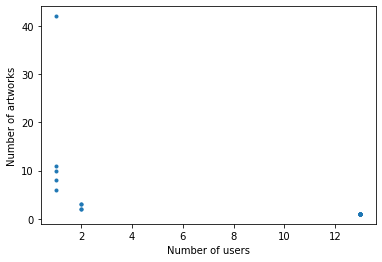

In [68]:
df = user_interactions2a.copy()
plt.scatter(df['Count'], df['lenInteractedArtworks'], marker = ".")
plt.xlabel("Number of users")
plt.ylabel("Number of artworks")
plt.show()




In [48]:

df.plot(x='Count', y='lenInteractedArtworks', marker='.')
#plt.title("title")




AttributeError: 'DataFrame' object has no attribute 'sort'

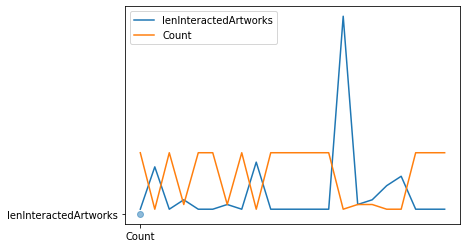

In [43]:
user_interactions2a.plot().scatter(x="Count", y="lenInteractedArtworks", alpha=0.5)
plt.show()



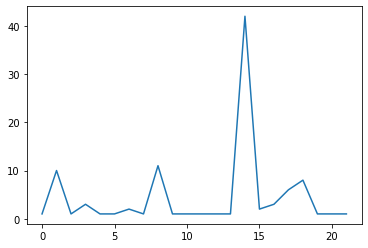

In [33]:
user_interactions2['lenInteractedArtworks
plt.show()